# Structure - Using the CRISP-DM framework
This document will use the CRISP-DM framework to analyze the previously mentioned dataset regarding questions about remote work. CRISP-DM is an industrial standard for Data Science projects, which divides the whole project into six smaller phases. These phases can be used as a guideline for the administration and implementation of any data science related project. All the phases are going to be explained shortly while we perform the necessary steps and operations on the data.

## I. Business Understanding
First, we need to understand the objectives of the project and the questions we want to answer. Before we define these questions, we take a look to get a basic understanding of the available data.

In [11]:
# Import necessary Python libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define basic settings for plots
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15, 15)})
sns.set(font_scale=2)

In [12]:
# Define the data paths and load the data as Pandas dataframes (Google Colab)
# from google.colab import drive
# drive.mount('/content/drive')
# results_public_path = "/content/drive/MyDrive/Colab Notebooks/stackoverflow/survey-results-public.csv"
# results_schema_path = "/content/drive/MyDrive/Colab Notebooks/stackoverflow/survey-results-schema.csv"

# Define the data paths and load the data as Pandas dataframes (local computer)
results_public_path = "./data/survey-results-public.csv"
results_schema_path = "./data/survey-results-schema.csv"
# Read the csv-files using Pandas
df_public = pd.read_csv(results_public_path)
df_schema = pd.read_csv(results_schema_path)

In [13]:
df_public.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [14]:
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


As we can see, the first csv-file contains the results from a survey among Stackoverflow users. The second csv-file contains an explanation for all the provided columns. Each column represents a question in the questionnaire.

After looking at the questions manually, we examined that the following questions from the survey are directly related to remote work:

- EmploymentStatus - Which of the following best describes your current employment status?
- HomeRemote - How often do you work from home or remotely?
- YearsProgram - How long has it been since you first learned how to program?
- YearsCodedJob - For how many years have you coded as part of your job?
- YearsCodedJobPast - For how many years did you code as part of your job?
- AssessJobRemote - When you're assessing potential jobs to apply to, how important are each of the following to you? The opportunity to work from home/remotely
- CollaborateRemote - It's harder to collaborate with remote peers than those on site


We formulate a case study to have a common thread for all our objectives during this project:

## Case Study

David is a young university graduant who likes to work as a data scientist - he is currently searching for a job. He is a highly motivated person who encounters problems as challenges and reframes drawbacks as new sources of motivation. He is willing to work hard to satisfy the needs and wishes of his customers. Therefore, he seems to be the ideal candidate for any employer who is currently hiring a data scientist. But David loves to travel and therefore he wants to work as a digital nomad. He wants to work location-independent and therefore he searches for a remote job. Additionally, he wants to work at a company with an interesting product and a progressive corporate culture because he want to identify with what he does - working only for money is not an option for him. Hence, job satisfaction is way more important for him than his salary.

Because David is a smart person, he uses his data science skills to find out some information about his potential perfect employer and what the requirements for a remote job are. These insights help him to prepare his search for interesting companies and for the application process.

Based on these requirements, we are going to formulate three key questions which we want to answer with the given data.

**Question 1 - Is remote work also common for young professionals, or is it more common for more experienced employees?**

This question can be answered in two ways:
1. How many people with plenty work experience work remotely, or in general: How many people work remotely based on their working experience.
2. How much work experience do employees have depending on whether they work remotely or not.

Because we have different levels of remote working levels (f.e. "About half the time" or "A few days each month"), it is not useful to calculate a hard percentage or a threshold. Hence we try to find a trend in the data that indicates if the experience of any employee is correlated with the amount of time he works remotely.

**Question 2 - Is a smaller or a bigger company more likely to offer remote jobs?**

This question also offers two ways to achieve an answer:
1. Is the size of a company linked to how many people they employ remotely? Here we need to find out a percentage value because in general a bigger company can be expected to employ more people remotely in absolute terms.
2. Is a remote worker more likely to work in a bigger or in a smaller company.

Again, we have different categories for company size, therefore we can again try to find a trend in the data that indicates a correlation.


**Question 3 - What are the most common ways for companies to search for remote workforce?**

To answer this question, we are going to analyze the information provided by the survey participants about where they heard about the open position for their current job. We are going to divide all the paticipants in two groups (remote and non-remote) to examine if there are any differences.


To get representative data, we assume that all participants who took part in the survey where randomly choosen from a pool of all software engineers, data scientists, students in the area of IT etc. 

## II. Data Understanding
The second phase in the CRISP-DM framework is about searching for data that can help us to answer the given questions. It is also import to review the data source to evaluate its correctness, potential biases and timeliness. Additionally, he data needs to be analyzed and explored to find out if it can provide helpful information to answer the objectives formulated in the Business Understanding phase.

In our project, it was necessary to change the order of the steps - because the data was provided first within the scope of this project, which is part of a  Udacity course. In this case, we saw the data first and then we formulated some interesting questions to answer. Therefore, we performed the data understanding first at the beginning of this Jupyter notebook. However, in real world projects, the concrete objectives will usually be pre-defined by business requirements or mangement inquiries. Data may not be available and need to be searched, purchased or collected.

Hence we can continue with the next step


## III. Data preparation
Within this step, we process the available data to make it suitable for our requirements. This step could include:
- Selecting / Excluding data
- Clean data (omit garbage-in, garbage-out) - We need to correcly deal with missing data, wrong data etc.
- Construct data (Creating new data columns based on existing ones, f.e. to create better indicators)
- Integrate data - Combine data from multiple sources
- Format data - Change the datatypes within the data set


Depending on the objectives and the data, some or even all of these methods and their respective techniques are necessary to prepare the data for later analysis. The data preparation part is often the most time-consuming one.

In [15]:
df_public.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

### Drop Respondent-column

We can drop the Respondent column, because Pandas already creates an own index. There is only a slight difference between the index
created by Pandas and the original index: the created index starts at 0, whereas the already existing index starts at 1. We choose to use the 0-based index and to drop the other one

In [16]:
if "Respondent" in df_public.columns:
    df_public.drop(columns=["Respondent"], axis=1, inplace=True)

In [17]:
# This prevents that Jupyter omits the middle part of the output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Next, we want to take a look a the the data columns provided in the dataframe
df_public.dtypes

Professional                         object
ProgramHobby                         object
Country                              object
University                           object
EmploymentStatus                     object
FormalEducation                      object
MajorUndergrad                       object
HomeRemote                           object
CompanySize                          object
CompanyType                          object
YearsProgram                         object
YearsCodedJob                        object
YearsCodedJobPast                    object
DeveloperType                        object
WebDeveloperType                     object
MobileDeveloperType                  object
NonDeveloperType                     object
CareerSatisfaction                  float64
JobSatisfaction                     float64
ExCoderReturn                        object
ExCoderNotForMe                      object
ExCoderBalance                       object
ExCoder10Years                  

We only have float values and string objects within our available data set.
Most of the columns with the datatype "object" contain categorical variables. Therefore we may use a conversion of these values to categorical data to make use of the build-in category functions in Pandas.

In [18]:
# Set the Pandas display settings back to normal
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

To answer all these questions, we need to examine the information about remote work provided in the dataset. First, we should gather some information about how many people work remote and to what extend. Therefore we are going to take a look at the column "HomeRemote"

### Examine HomeRemote-column

In [19]:
def analyze_column(column):
  """
  This functions prints all the distinct values of a column with their absolute occurance. Additionally, the amount of null-values in the column is printed.

  Arguments:
    column: The column to analyze

  Returns:
    None
  """

  print("Value counts: \n")
  print(column.value_counts())
  print(f"\nNull values: {column.isnull().sum()}")

In [20]:
# Filter for people who have a job and check if there are any missing values
analyze_column(df_public["HomeRemote"])

Value counts: 

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64

Null values: 7384


As we can see, we have many missing values. We need to consider that this dataset not only contains data from employees, but also from students etc. Therefore we should also take a look at the column "Professional" to exclude people who are not working at all.

In [21]:
# Filter for people who have a job!
analyze_column(df_public["Professional"])

Value counts: 

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

Null values: 0


This column does not contain any missing values. The number of students is also in the same magnitude as the number of missing values in the "HomeRemote"-column. To check of many of the missing values in this columns are students who do now work, we check the amount of missing values int the "HomeRemote"-column again, excluding the students.

In [22]:
df_public.loc[df_public["Professional"] != "Student"]["HomeRemote"].isnull().sum()


2406

We already got rid of many of the missing values. We also exclude anybody, who selected "None of these" to potentially further shrink the amount of missing values

In [23]:
#df_public[(df_public["HomeRemote"] != "It's complicated ")
options = ["Student", "None of these"]
df_public.loc[~df_public["Professional"].isin(options)]["HomeRemote"].isnull().sum()

1493

Additionally, we can also remove anybody who selected "Used to be a professional developer", because these people may already retired.

In [24]:
#df_public[(df_public["HomeRemote"] != "It's complicated ")
options = ["Student", "None of these", "Used to be a professional developer"]
df_public.loc[~df_public["Professional"].isin(options)]["HomeRemote"].isnull().sum()

1243

To exclude the previously mentioned values from "Professionsal", we are going to create a new dataset for all survey participants who are for sure actively working.

In [25]:
df_working = df_public.loc[~df_public["Professional"].isin(options)].copy()

There are still more than 1200 missing values! We are going to replace these values with a own category, because maybe the information can be useful in the future. Hence, we fill the string "No information" to all the missing fields.

In [26]:
df_working["HomeRemote"].fillna(value="No information", inplace=True)

This column contains categorical information, therefore we change the datatype of the column. Additionally, the categories are in a order and can be compared to each other regarding home much time an emplooyee works remotely or at home.
We can use CategoricalDtype to specify our own categories and to order them appropriately
Further information about categories in Pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

In [27]:
# Import the datatype CategoricalDtype from the Pandas library
from pandas.api.types import CategoricalDtype
# We need to specify the categories manually to impose an order on them. A low order indicates a person who never works remotely, a high order indicates a person who works all or almost all the time remotely.
homeRemote_cat_strings = ["Never",
                        "It's complicated",
                        "No information",
                        "A few days each month",
                        "Less than half the time, but at least one day each week",
                        "About half the time",
                        "More than half, but not all, the time",
                        "All or almost all the time (I'm full-time remote)"]
homeRemote_cats = CategoricalDtype(categories = homeRemote_cat_strings, ordered = True)

# Converting a column to the "category" datatype
df_working["HomeRemote"] = df_working["HomeRemote"].astype(homeRemote_cats) 

In [28]:
# We can print the frequency of occurance in plain numbers, but we can  also ...
analyze_column(df_working["HomeRemote"])

Value counts: 

A few days each month                                      14584
Never                                                      12591
All or almost all the time (I'm full-time remote)           4324
Less than half the time, but at least one day each week     3784
It's complicated                                            1716
More than half, but not all, the time                       1571
About half the time                                         1458
No information                                              1243
Name: HomeRemote, dtype: int64

Null values: 0


In [45]:
def bar_plot_cats(column, title, cat_labels=None, hue = None):
    """
    This function plots a bar chart showing the occurances of certain categories in a categorical column.

    Arguments:
    column: A Pandas dataframe column or a Pandas series
    title: A title which is going to printed above the chart
    cat_labels: A string list of the category labels in the desired sequence - Can be empty, in this case the default order is used
    hue: If the column is part of a dataframe, a hue column from that same dataframe can be specified - Can be empty, in this case no hue is applied

    Returns:
    None

    """
    sns.set_palette("Set1")
    plot = sns.countplot(x = column, order = cat_labels, hue=hue) #  color='blue',
    # plot = sns.countplot(order = cat_labels, hue=hue) 
    plot.set_title(title)
    # Do not display the name for the x-axis
    plot.set(xlabel=None)
    # Set the order manually by providing the string list of the categories
    if cat_labels != None:
        dummy_var = plot.set_xticklabels(labels = cat_labels, rotation=90)

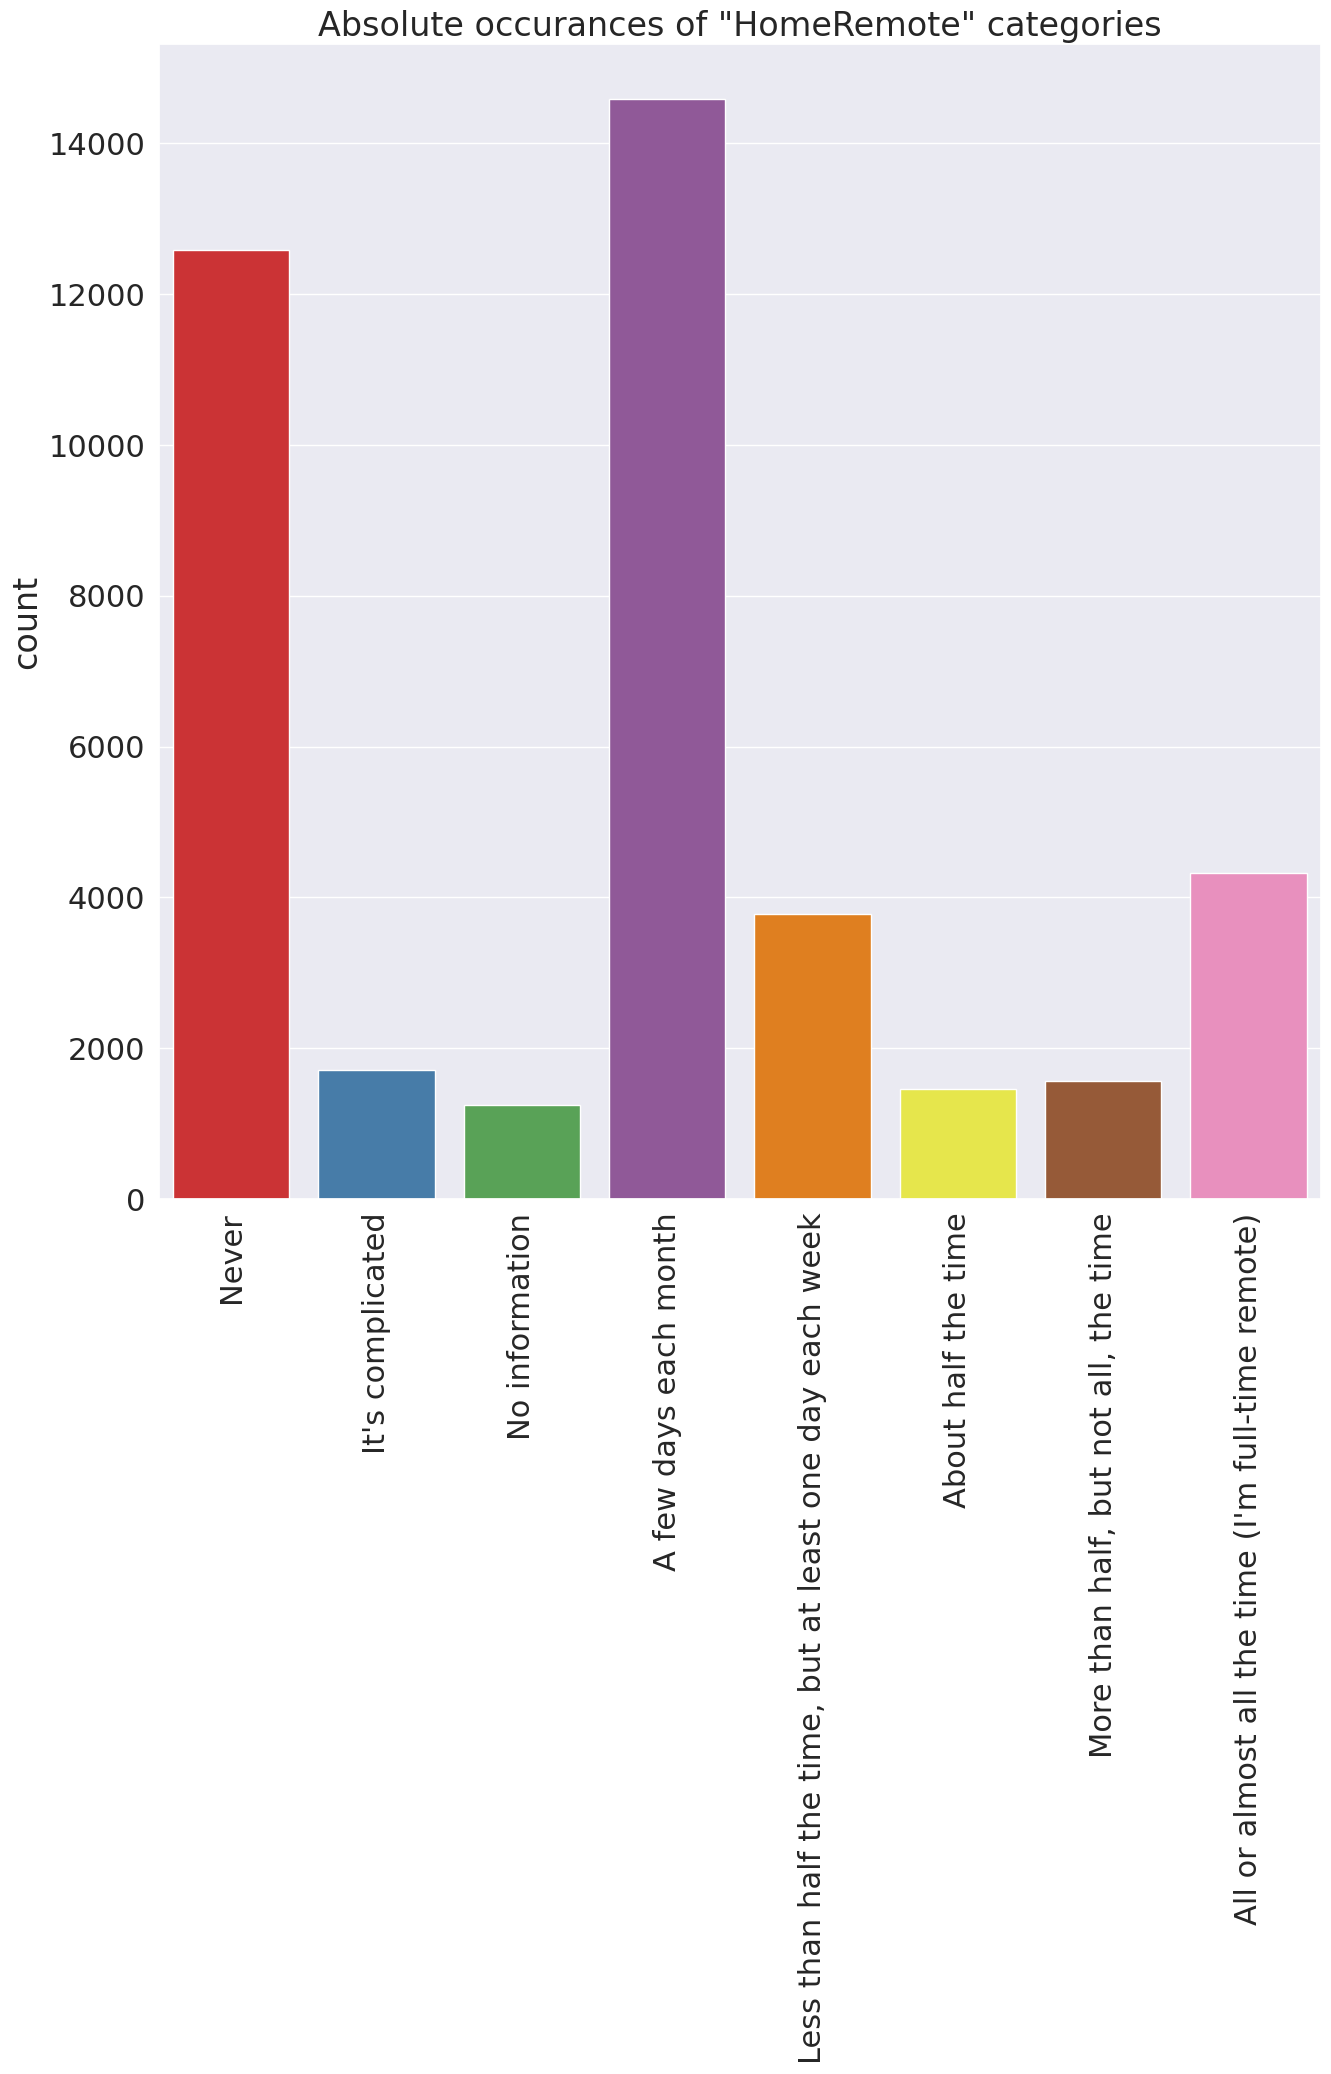

In [46]:
bar_plot_cats(title = 'Absolute occurances of "HomeRemote" categories',
  cat_labels   = homeRemote_cat_strings,
  column = df_working["HomeRemote"]
)

In [47]:
print("Relative distribution of the different categories related to remote work: \n" )
for category in homeRemote_cat_strings:
    percentage_full_remote = df_working.loc[df_working["HomeRemote"] == category]["HomeRemote"].count()/df_working.shape[0]
    print(f"{category}: {round(percentage_full_remote*100,2)}%" )

#print(f"{round(percentage_full_remote*100,2)}% of all employees work completly or almost completly remote")

Relative distribution of the different categories related to remote work: 

Never: 30.51%
It's complicated: 4.16%
No information: 3.01%
A few days each month: 35.34%
Less than half the time, but at least one day each week: 9.17%
About half the time: 3.53%
More than half, but not all, the time: 3.81%
All or almost all the time (I'm full-time remote): 10.48%


As we can see, working remotely or from home is still not common. Most employees never work from home or only for a few days each month. On the other hand, around 10% work fully remote.

### Create Remote-column

 We are going to take a look at all levels of Remote work, but we are also going to create a new column with a boolean value for remote work or not. This column is used to create plots which may are better readable. We define "More than half, but not all, the time" and "All or almost all the time (I'm full-time remote)" as remote work and the others not.

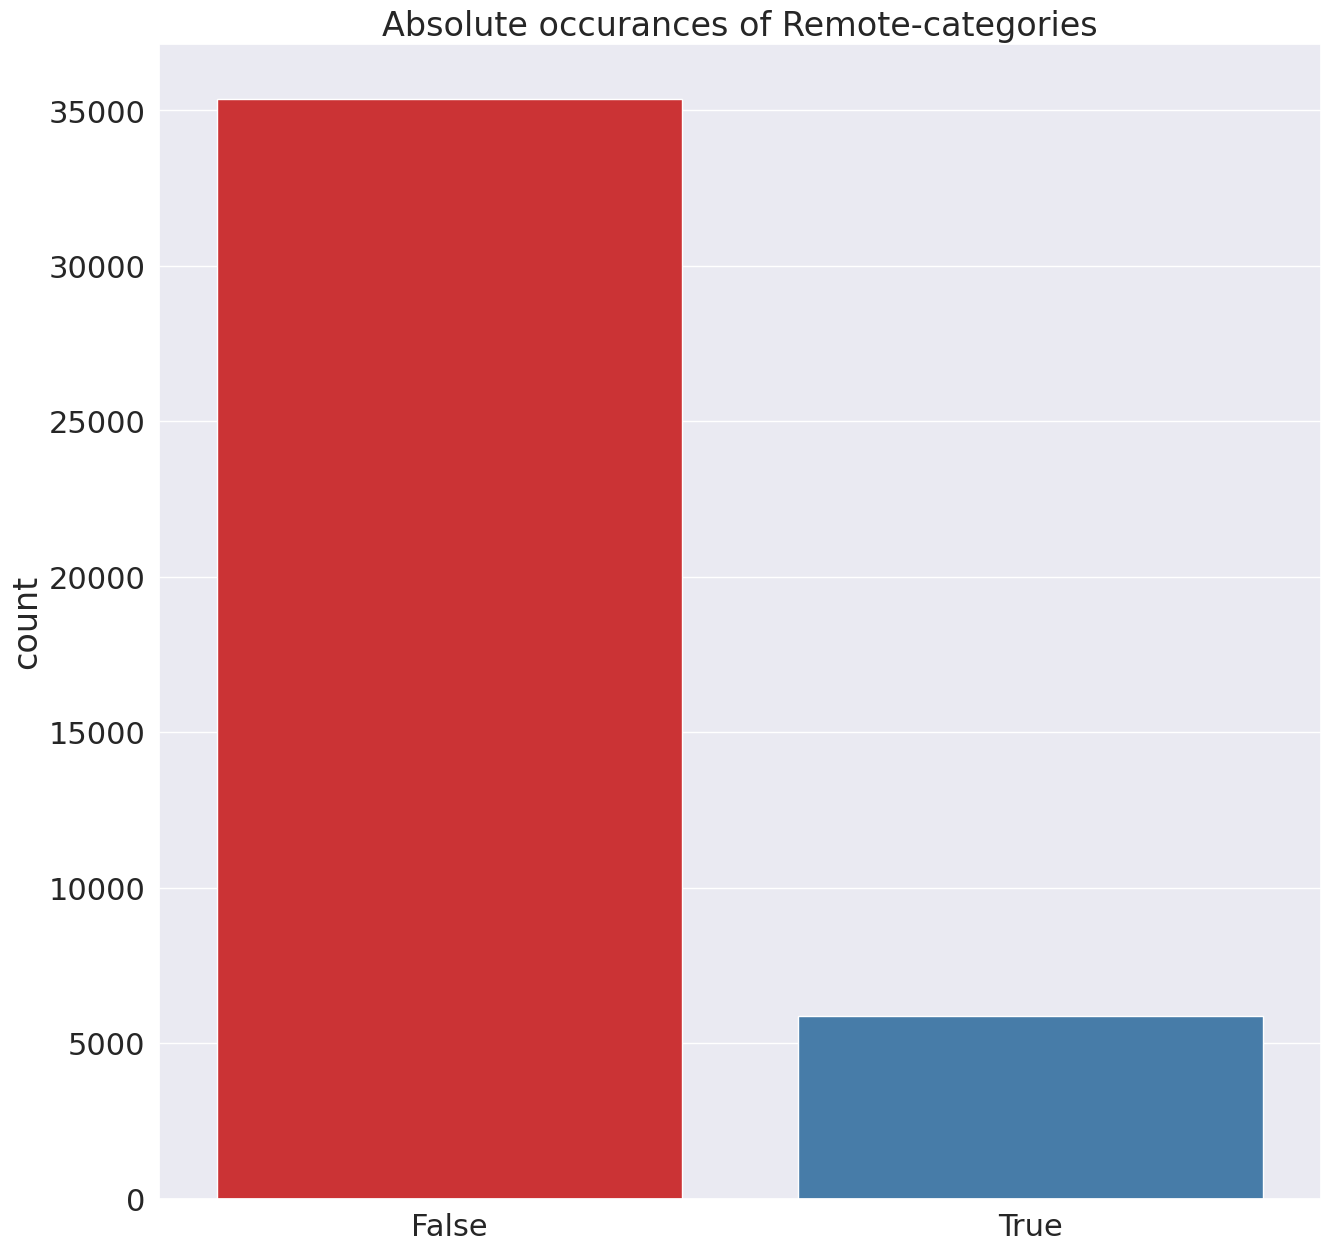

In [48]:
options = ["More than half, but not all, the time", "All or almost all the time (I'm full-time remote)"]
df_working["Remote"] = df_working["HomeRemote"].isin(options)
bar_plot_cats(column = df_working["Remote"], 
              title= 'Absolute occurances of Remote-categories')

## Modeling, Evaluation and Deployment
The three last steps of the CRISP-DM framework are going to be applied to each question individually. More information regarding the CRISP-DM model can be found here: https://www.datascience-pm.com/crisp-dm-2/

## Question 1 - Is remote work also common for young professionals, or is it more common for more experienced employees?

### Column YearsCodedJob

Now we are going to take a look at the coding experience of the different groups:

In [49]:
analyze_column(df_working["YearsCodedJob"])

Value counts: 

1 to 2 years        5289
2 to 3 years        4765
3 to 4 years        4002
4 to 5 years        3404
20 or more years    3067
                    ... 
16 to 17 years       694
17 to 18 years       545
13 to 14 years       531
19 to 20 years       427
18 to 19 years       403
Name: YearsCodedJob, Length: 21, dtype: int64

Null values: 385


This also seems to be a categorical variable! We look at the frequency of the different provided answers:

There are around 385 null-values. This is only a small portion of the dataset, therefore we are going to drop them

In [50]:
df_working.dropna(subset=["YearsCodedJob"], inplace=True)

This column basically contains numerical values, which are stored as categories. We can convert them to a new integer column "FullYearsCodedJob". Therefore we take the first number in the specified range as the value, 
f.e. "13 to 14 years" gets stored to "13". We can use a mapping to specify which string value should get converted to which number.

In [51]:
# Dict which defines how to map the values from "YearsCodedJob" to "FullYearsCodedJob"
YearsCodedJob_mapping = {"Less than a year" : 0,
                        "1 to 2 years" : 1,
                        "2 to 3 years" : 2,
                        "3 to 4 years" : 3,
                        "4 to 5 years" : 4,
                        "5 to 6 years" : 5,
                        "6 to 7 years" : 6,
                        "7 to 8 years" : 7,
                        "8 to 9 years" : 8,
                        "9 to 10 years" : 9,
                        "10 to 11 years" : 10,
                        "11 to 12 years" : 11,
                        "12 to 13 years" : 12,
                        "13 to 14 years" : 13,
                        "14 to 15 years" : 14,
                        "15 to 16 years" : 15,
                        "16 to 17 years" : 16,
                        "17 to 18 years" : 17,
                        "18 to 19 years" : 18,
                        "19 to 20 years" : 19,
                        "20 or more years" : 20,
                      #  "No information" : 21 # We need to consider that we do not know anything about these persons, therefore we cannot consider this category to be in the same order as the other ones
                        }
# Perform the mapping
df_working["FullYearsCodedJob"] = df_working["YearsCodedJob"].map(YearsCodedJob_mapping)


# Change the original column to a categorical one
YearsCodedJob_cat_strings = ["Less than a year",
                        "1 to 2 years",
                        "2 to 3 years",
                        "3 to 4 years",
                        "4 to 5 years",
                        "5 to 6 years",
                        "6 to 7 years",
                        "7 to 8 years",
                        "8 to 9 years",
                        "9 to 10 years",
                        "10 to 11 years",
                        "11 to 12 years",
                        "12 to 13 years",
                        "13 to 14 years",
                        "14 to 15 years",
                        "15 to 16 years",
                        "16 to 17 years",
                        "17 to 18 years",
                        "18 to 19 years",
                        "19 to 20 years",
                        "20 or more years",
                       # "No information" # We need to consider that we do not know anything about these persons, therefore we cannot consider this category to be in the same order as the other ones
                            ]
YearsCodedJob_cats = CategoricalDtype(categories = YearsCodedJob_cat_strings, ordered = True)

# Converting a column to the "category" datatype
df_working["YearsCodedJob"] = df_working["YearsCodedJob"].astype(YearsCodedJob_cats) 

In [52]:
analyze_column(df_working["YearsCodedJob"])

Value counts: 

1 to 2 years        5289
2 to 3 years        4765
3 to 4 years        4002
4 to 5 years        3404
20 or more years    3067
                    ... 
16 to 17 years       694
17 to 18 years       545
13 to 14 years       531
19 to 20 years       427
18 to 19 years       403
Name: YearsCodedJob, Length: 21, dtype: int64

Null values: 0


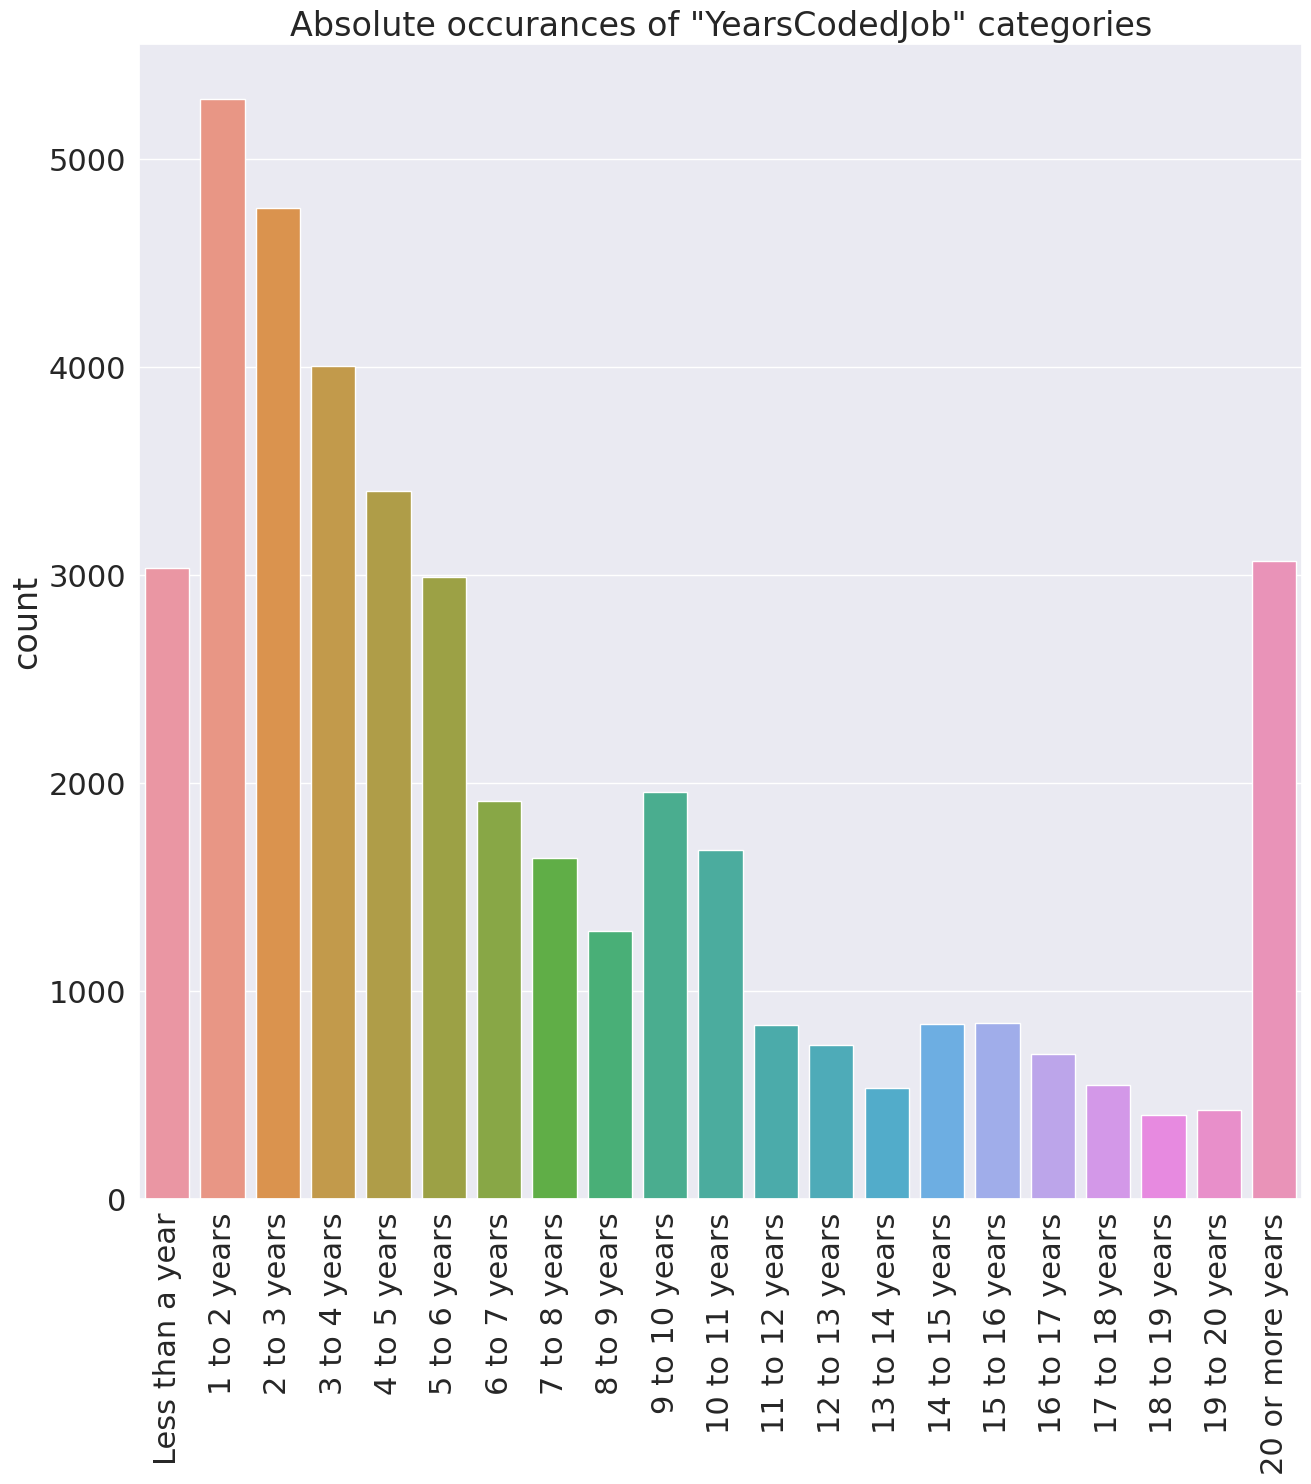

In [54]:
# As earlier, we can create a bar chart to visualize the frequency of the categories
bar_plot_cats(title = 'Absolute occurances of "YearsCodedJob" categories',
  cat_labels   = YearsCodedJob_cat_strings,
  column = df_working["YearsCodedJob"]
)

### Column YearsCodedJobPast

The next variable we want to analyze is "YearsCodedJobPast". From the description, we cannot get the difference to the previous column

In [55]:
analyze_column(df_working["YearsCodedJobPast"])

Value counts: 

7 to 8 years        2
Less than a year    2
6 to 7 years        2
15 to 16 years      2
1 to 2 years        1
11 to 12 years      1
3 to 4 years        1
Name: YearsCodedJobPast, dtype: int64

Null values: 40875


In [56]:
df_working["YearsCodedJobPast"].isnull().sum()/df_working.shape[0]

0.9997309592525558

This column mainly contains nan values and the meaning is not described sufficiently, therefore we are going to drop the column

In [57]:
df_working.drop(columns=["YearsCodedJobPast"], axis=1, inplace=True)

### Analyze average coding experience

Now we want to analyze the employee's average coding experience for each HomeRemote-category. We exclude the employees who selected "It's complicated" regarding their ability to work remotely because we do not know of each of these individuals spends much or less time working remotely.

In [58]:
options = ["It's complicated", "No information"]
df_working = df_working.loc[~df_working["HomeRemote"].isin(options)]

In [65]:
df_working["HomeRemote"] = df_working["HomeRemote"].cat.remove_unused_categories().copy()
average_work_experience = df_working.groupby("HomeRemote").mean(numeric_only=True)["FullYearsCodedJob"]
average_work_experience

HomeRemote
Never                                                      5.346656
A few days each month                                      6.656060
Less than half the time, but at least one day each week    7.504255
About half the time                                        7.155387
More than half, but not all, the time                      7.440438
All or almost all the time (I'm full-time remote)          8.758283
Name: FullYearsCodedJob, dtype: float64

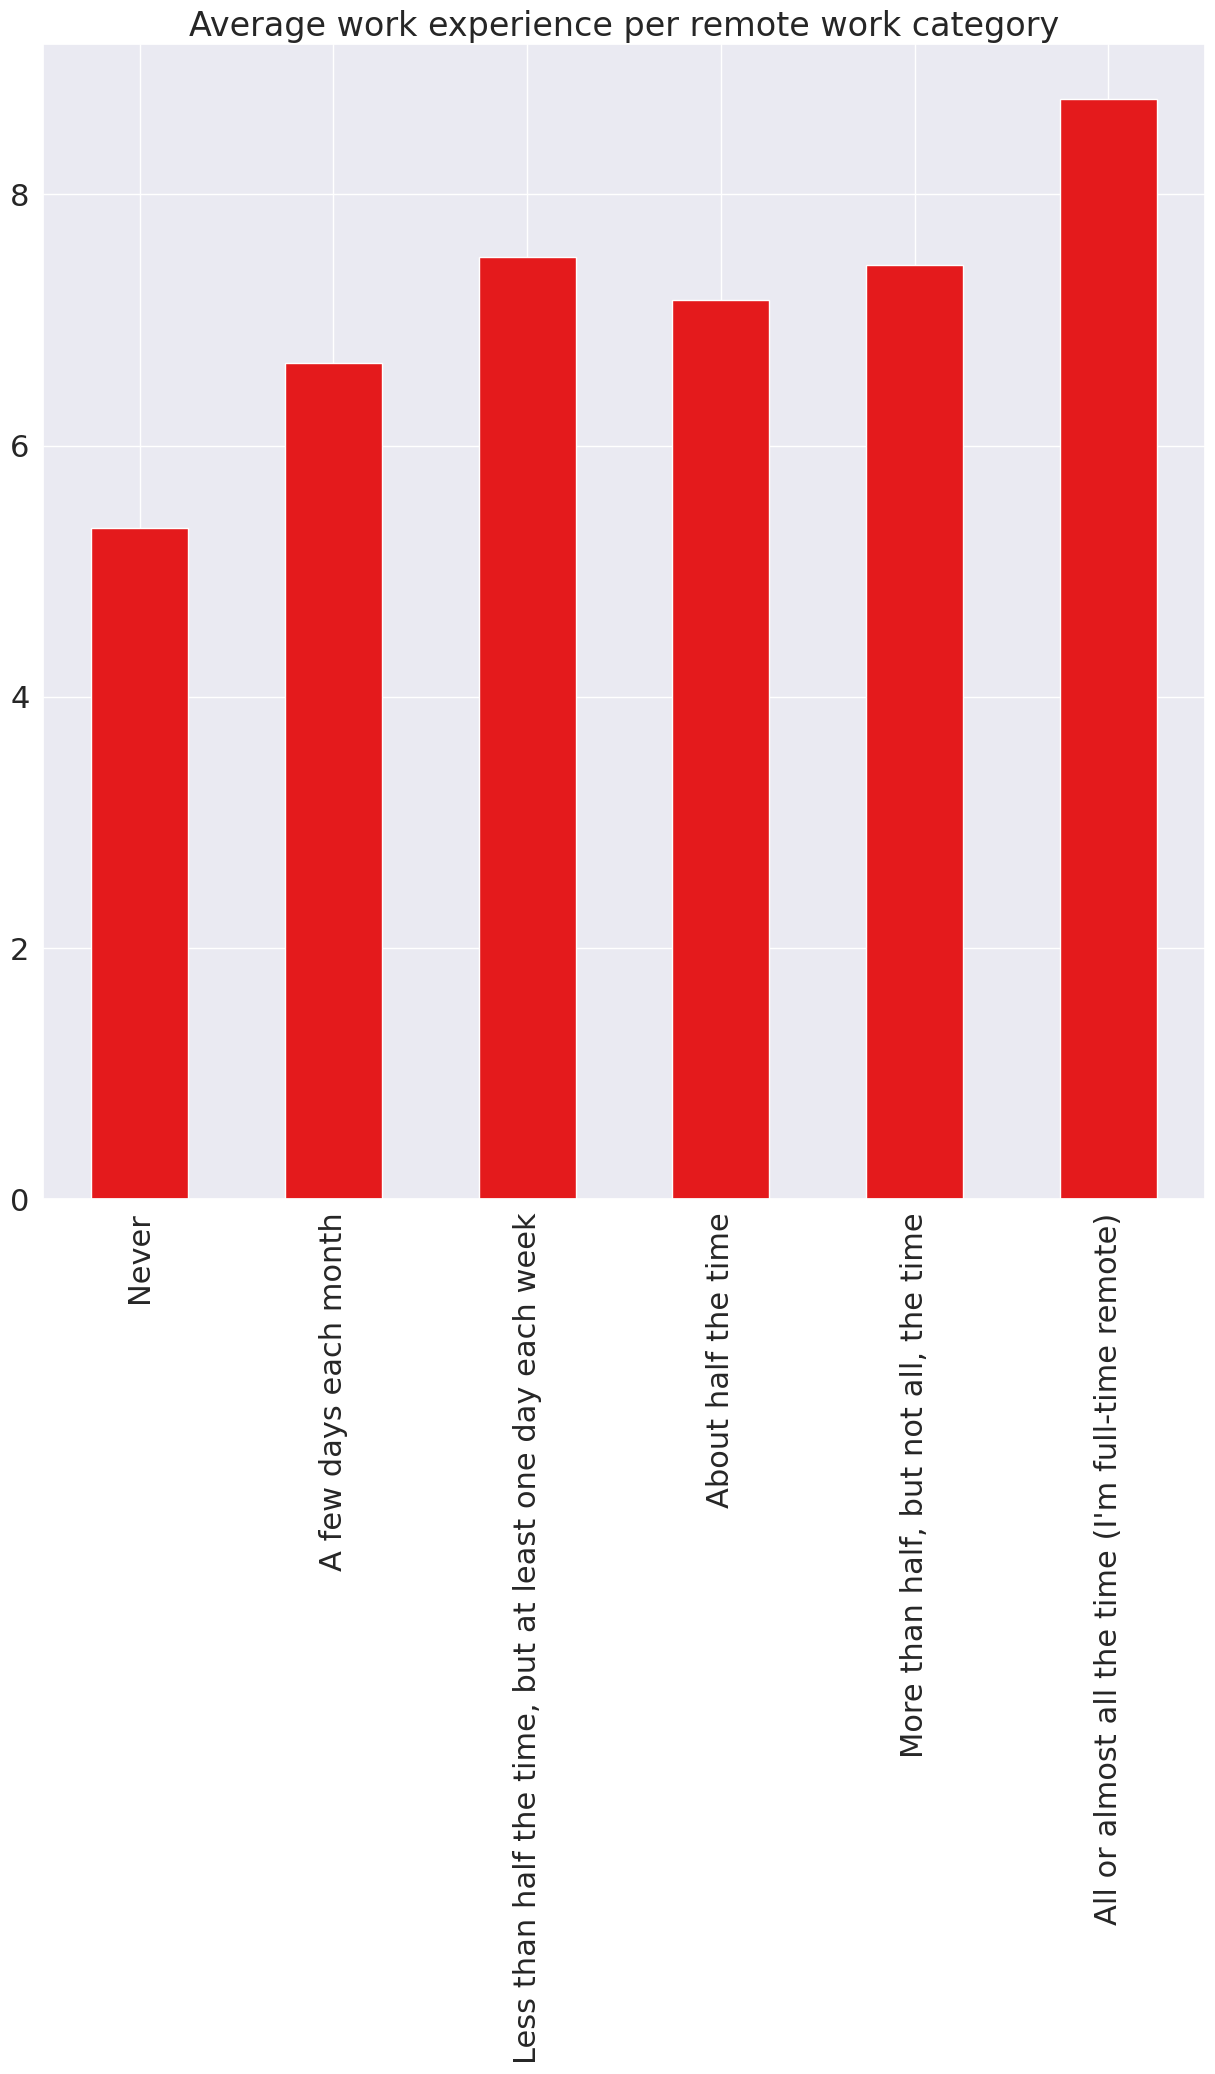

In [66]:
plt = average_work_experience.plot(kind="bar")
plt.set(xlabel=None)
dummy_var = plt.set_title("Average work experience per remote work category")

### Question 1 - Result
As we can see, there seems to be a general trend indicating that employees with more working experience are more likely to work remotely than employees with less working experience.

## Questions 2 - Is a smaller or a bigger company more likely to offer remote jobs?
To answer this question, we need to take a look at the different company sizes in which the survey participants work. To only use the data from people who are currently working, we use our cleaned and preprocessed dataset from the first question.

In [67]:
df_working.head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,Remote,FullYearsCodedJob
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,False,20
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,False,9
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,10
6,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,...,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN,False,8
7,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Pre-series A startup,...,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN,True,7


To answer this question, we are going to look at the "CompanySize" column

In [68]:
analyze_column(df_working["CompanySize"])

Value counts: 

20 to 99 employees          7617
100 to 499 employees        6477
10,000 or more employees    4948
10 to 19 employees          3538
1,000 to 4,999 employees    3347
Fewer than 10 employees     3271
500 to 999 employees        2186
5,000 to 9,999 employees    1403
I don't know                 606
I prefer not to answer       517
Name: CompanySize, dtype: int64

Null values: 4110


Again we create a categorical variable from the data

In [69]:
df_working["CompanySize"].fillna("No data", inplace=True)
# Change the original column to a categorical one
CompanySize_cat_strings = ["Fewer than 10 employees",
                        "20 to 99 employees",
                        "100 to 499 employees",
                        "500 to 999 employees",
                        "1,000 to 4,999 employees",
                        "5,000 to 9,999 employees",
                        "10,000 or more employees",
                        "I don't know",
                        "I prefer not to answer",
                        "No data",
                            ]
CompanySize_cats = CategoricalDtype(categories = CompanySize_cat_strings, ordered = True)

# Converting a column to the "category" datatype
df_working["CompanySize"] = df_working["CompanySize"].astype(CompanySize_cats) 

In [70]:
df_working["CompanySize"].value_counts()

20 to 99 employees          7617
100 to 499 employees        6477
10,000 or more employees    4948
No data                     4110
1,000 to 4,999 employees    3347
Fewer than 10 employees     3271
500 to 999 employees        2186
5,000 to 9,999 employees    1403
I don't know                 606
I prefer not to answer       517
Name: CompanySize, dtype: int64

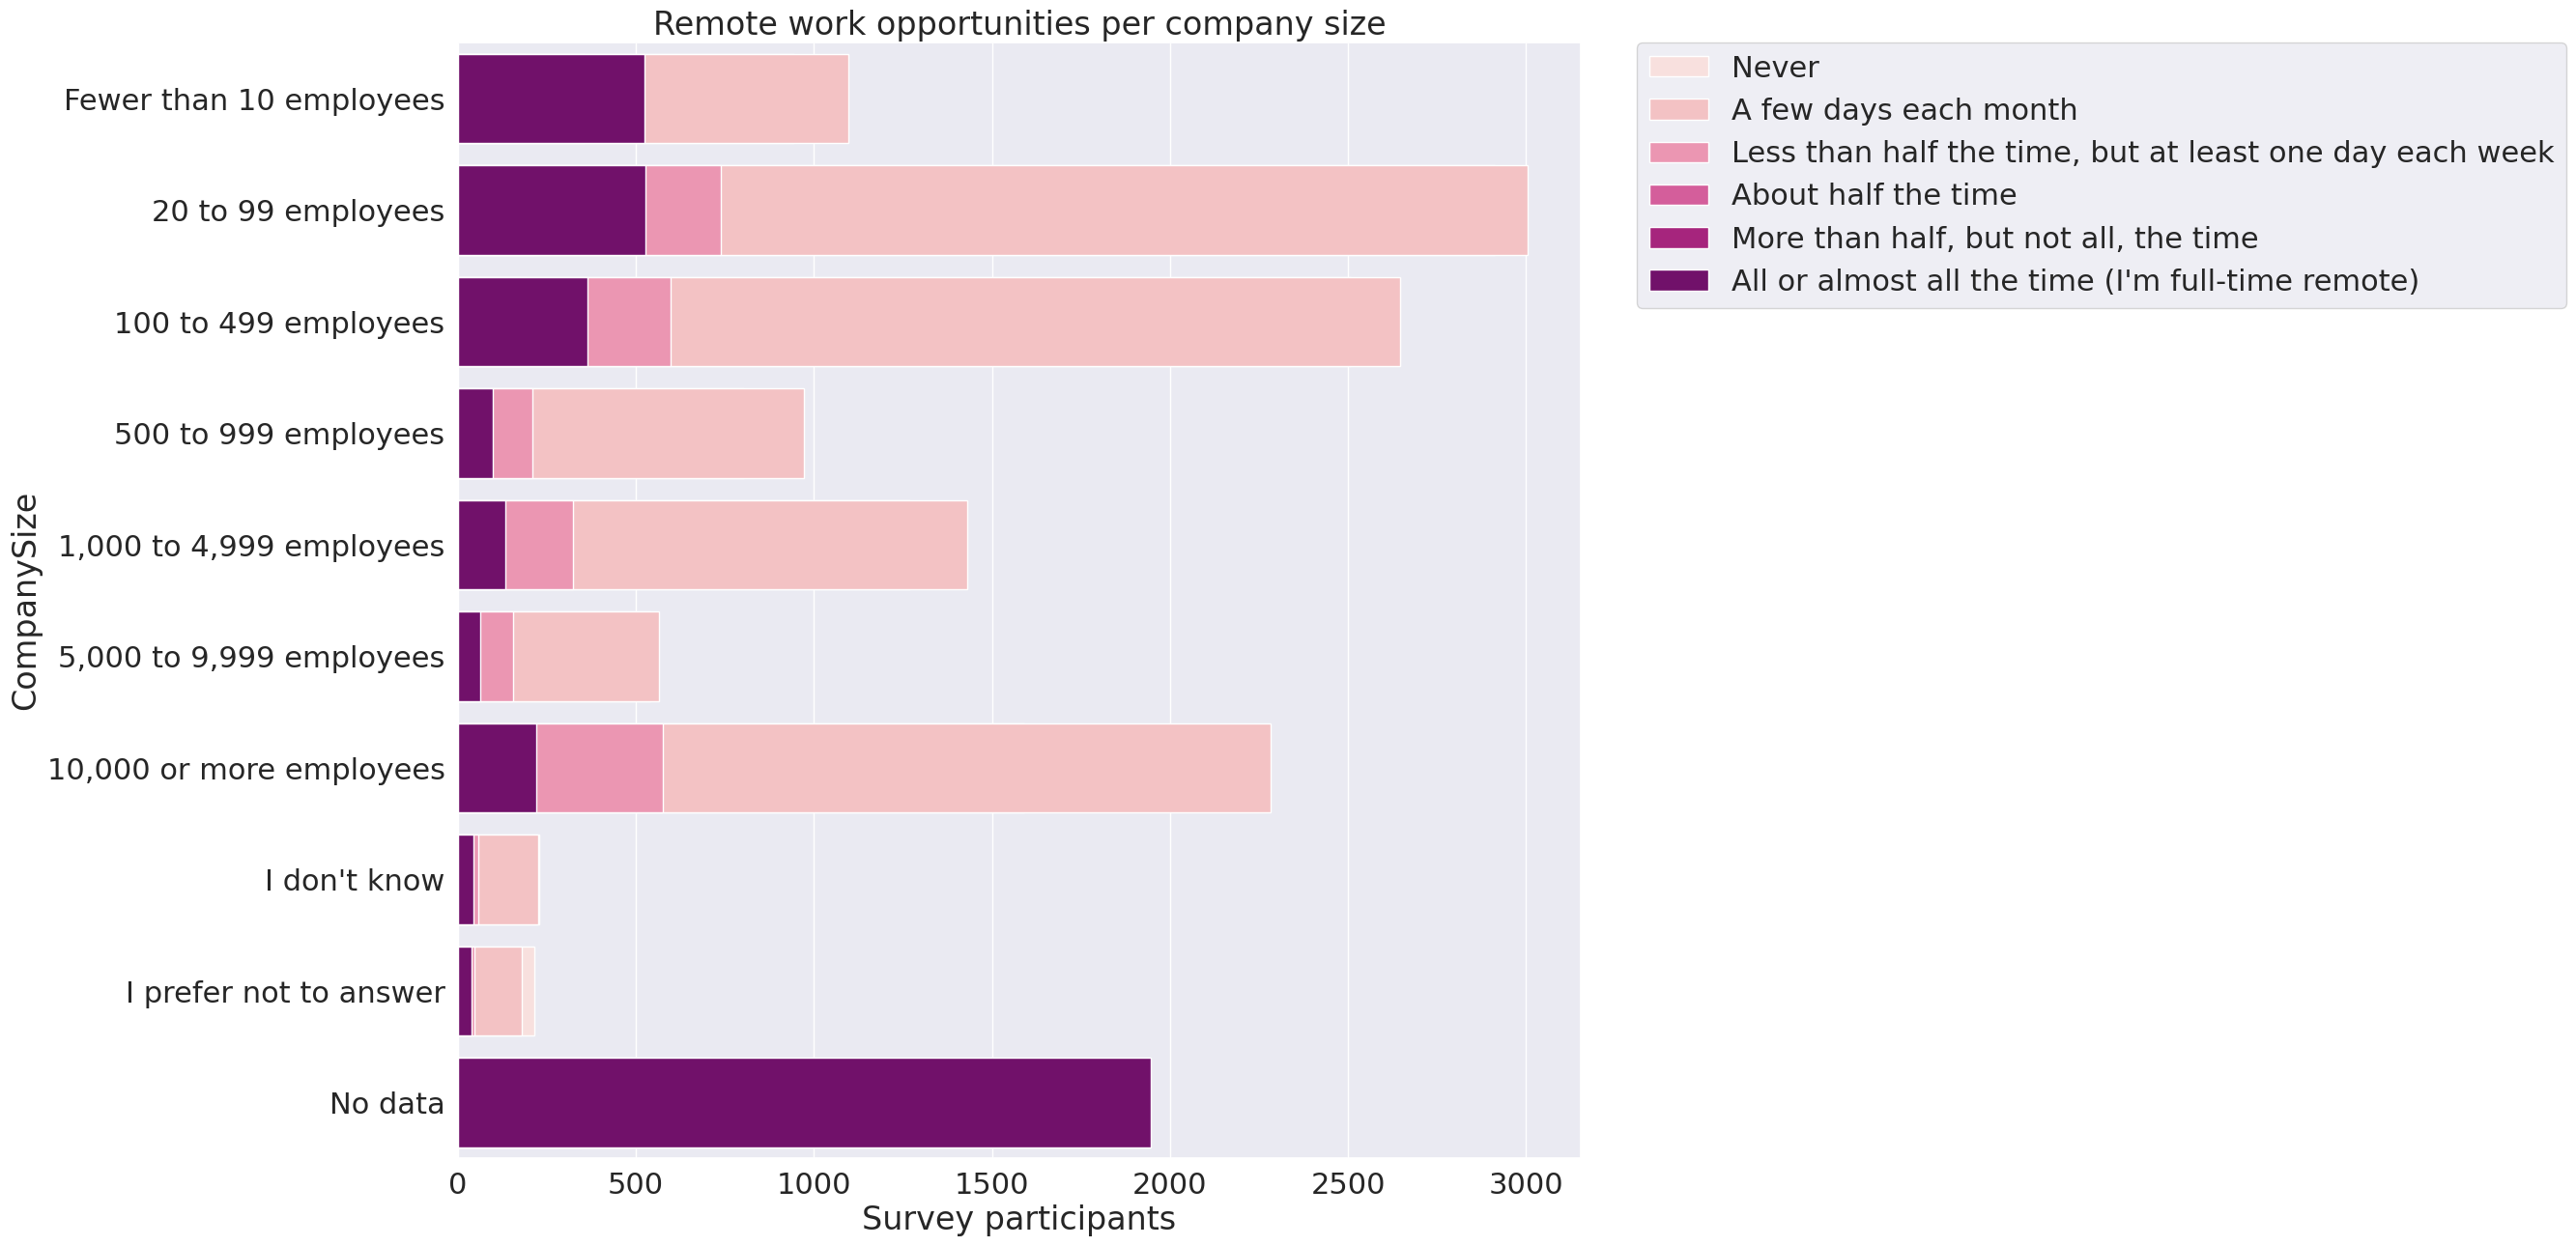

In [74]:
sns.set_palette("RdPu")
plt = sns.countplot(y = df_working["CompanySize"], hue = df_working["HomeRemote"],  dodge=False, orient="v",   order = CompanySize_cat_strings) # color='blue',
# Plot the legend outside of the main plot
plt.set_title("Remote work opportunities per company size")
plt.set(xlabel="Survey participants")
dummy_var = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#dummy_var = plt.legend(loc='lower right',fontsize = "small")

It is suspicious that the survey participants for which we do not have information regarding the company size all work remotely. This could be because these participants may work as freelancers. Anyway - this chart is not very descriptive because absolute values are used. Therefore we create a new dataframe which contains the relevant relative values so that we are able to plot them

In [75]:
abs_remote_size_stats = df_working.groupby("CompanySize")["HomeRemote"].value_counts(sort=False)
rel_remote_size_stats = abs_remote_size_stats / abs_remote_size_stats.groupby("CompanySize").sum()*100

In [76]:
rel_remote_size_stats

CompanySize              HomeRemote                                             
Fewer than 10 employees  Never                                                      28.890248
                         A few days each month                                      33.506573
                         Less than half the time, but at least one day each week    10.852950
                         About half the time                                         5.044329
                         More than half, but not all, the time                       5.716906
                                                                                      ...    
No data                  A few days each month                                      17.226277
                         Less than half the time, but at least one day each week     8.394161
                         About half the time                                         8.223844
                         More than half, but not all, the time           

In [77]:
comp_size_index = ['Fewer than 10 employees',
                        '20 to 99 employees',
                        '100 to 499 employees',
                        '500 to 999 employees',
                        '1,000 to 4,999 employees',
                        '5,000 to 9,999 employees',
                        '10,000 or more employees',
                        'I don\'t know',
                        'I prefer not to answer',
                        'No data']
data_array = rel_remote_size_stats.values.reshape(10,6)
df = pd.DataFrame(data_array, 
                  index = comp_size_index,
                  
                  columns = [ 'Never',
                          'A few days each month',
                          'Less than half the time, but at least one day each week',
                          'About half the time',
                          'More than half, but not all, the time',
                          'All or almost all the time (I\'m full-time remote)']
                 )

In [78]:
df

,Never,A few days each month,"Less than half the time, but at least one day each week",About half the time,"More than half, but not all, the time",All or almost all the time (I'm full-time remote)
Fewer than 10 employees,28.890248,33.506573,10.852950,5.044329,5.716906,15.988994
20 to 99 employees,38.217146,39.438099,9.701982,2.953919,2.783248,6.905606
100 to 499 employees,38.706191,40.852246,9.217230,2.948896,2.670990,5.604447
500 to 999 employees,36.779506,44.419030,9.560842,1.967063,2.790485,4.483074
"1,000 to 4,999 employees",37.974305,42.724828,9.650433,2.718853,2.927995,4.003585
"5,000 to 9,999 employees",38.560228,40.342124,10.976479,3.492516,2.066999,4.561654
"10,000 or more employees",32.174616,46.139854,11.661277,3.071948,2.506063,4.446241
I don't know,37.788779,37.458746,9.570957,4.290429,3.630363,7.260726
I prefer not to answer,41.586074,34.816248,9.090909,3.675048,3.288201,7.543520
No data,6.885645,17.226277,8.394161,8.223844,11.922141,47.347932


In [79]:
# We take the transpose of the dataframe because we want to have each company size category (which sums up to 100%) as one column
temp_df = df.T
temp_df

,Fewer than 10 employees,20 to 99 employees,100 to 499 employees,500 to 999 employees,"1,000 to 4,999 employees","5,000 to 9,999 employees","10,000 or more employees",I don't know,I prefer not to answer,No data
Never,28.890248,38.217146,38.706191,36.779506,37.974305,38.560228,32.174616,37.788779,41.586074,6.885645
A few days each month,33.506573,39.438099,40.852246,44.419030,42.724828,40.342124,46.139854,37.458746,34.816248,17.226277
"Less than half the time, but at least one day each week",10.852950,9.701982,9.217230,9.560842,9.650433,10.976479,11.661277,9.570957,9.090909,8.394161
About half the time,5.044329,2.953919,2.948896,1.967063,2.718853,3.492516,3.071948,4.290429,3.675048,8.223844
"More than half, but not all, the time",5.716906,2.783248,2.670990,2.790485,2.927995,2.066999,2.506063,3.630363,3.288201,11.922141
All or almost all the time (I'm full-time remote),15.988994,6.905606,5.604447,4.483074,4.003585,4.561654,4.446241,7.260726,7.543520,47.347932


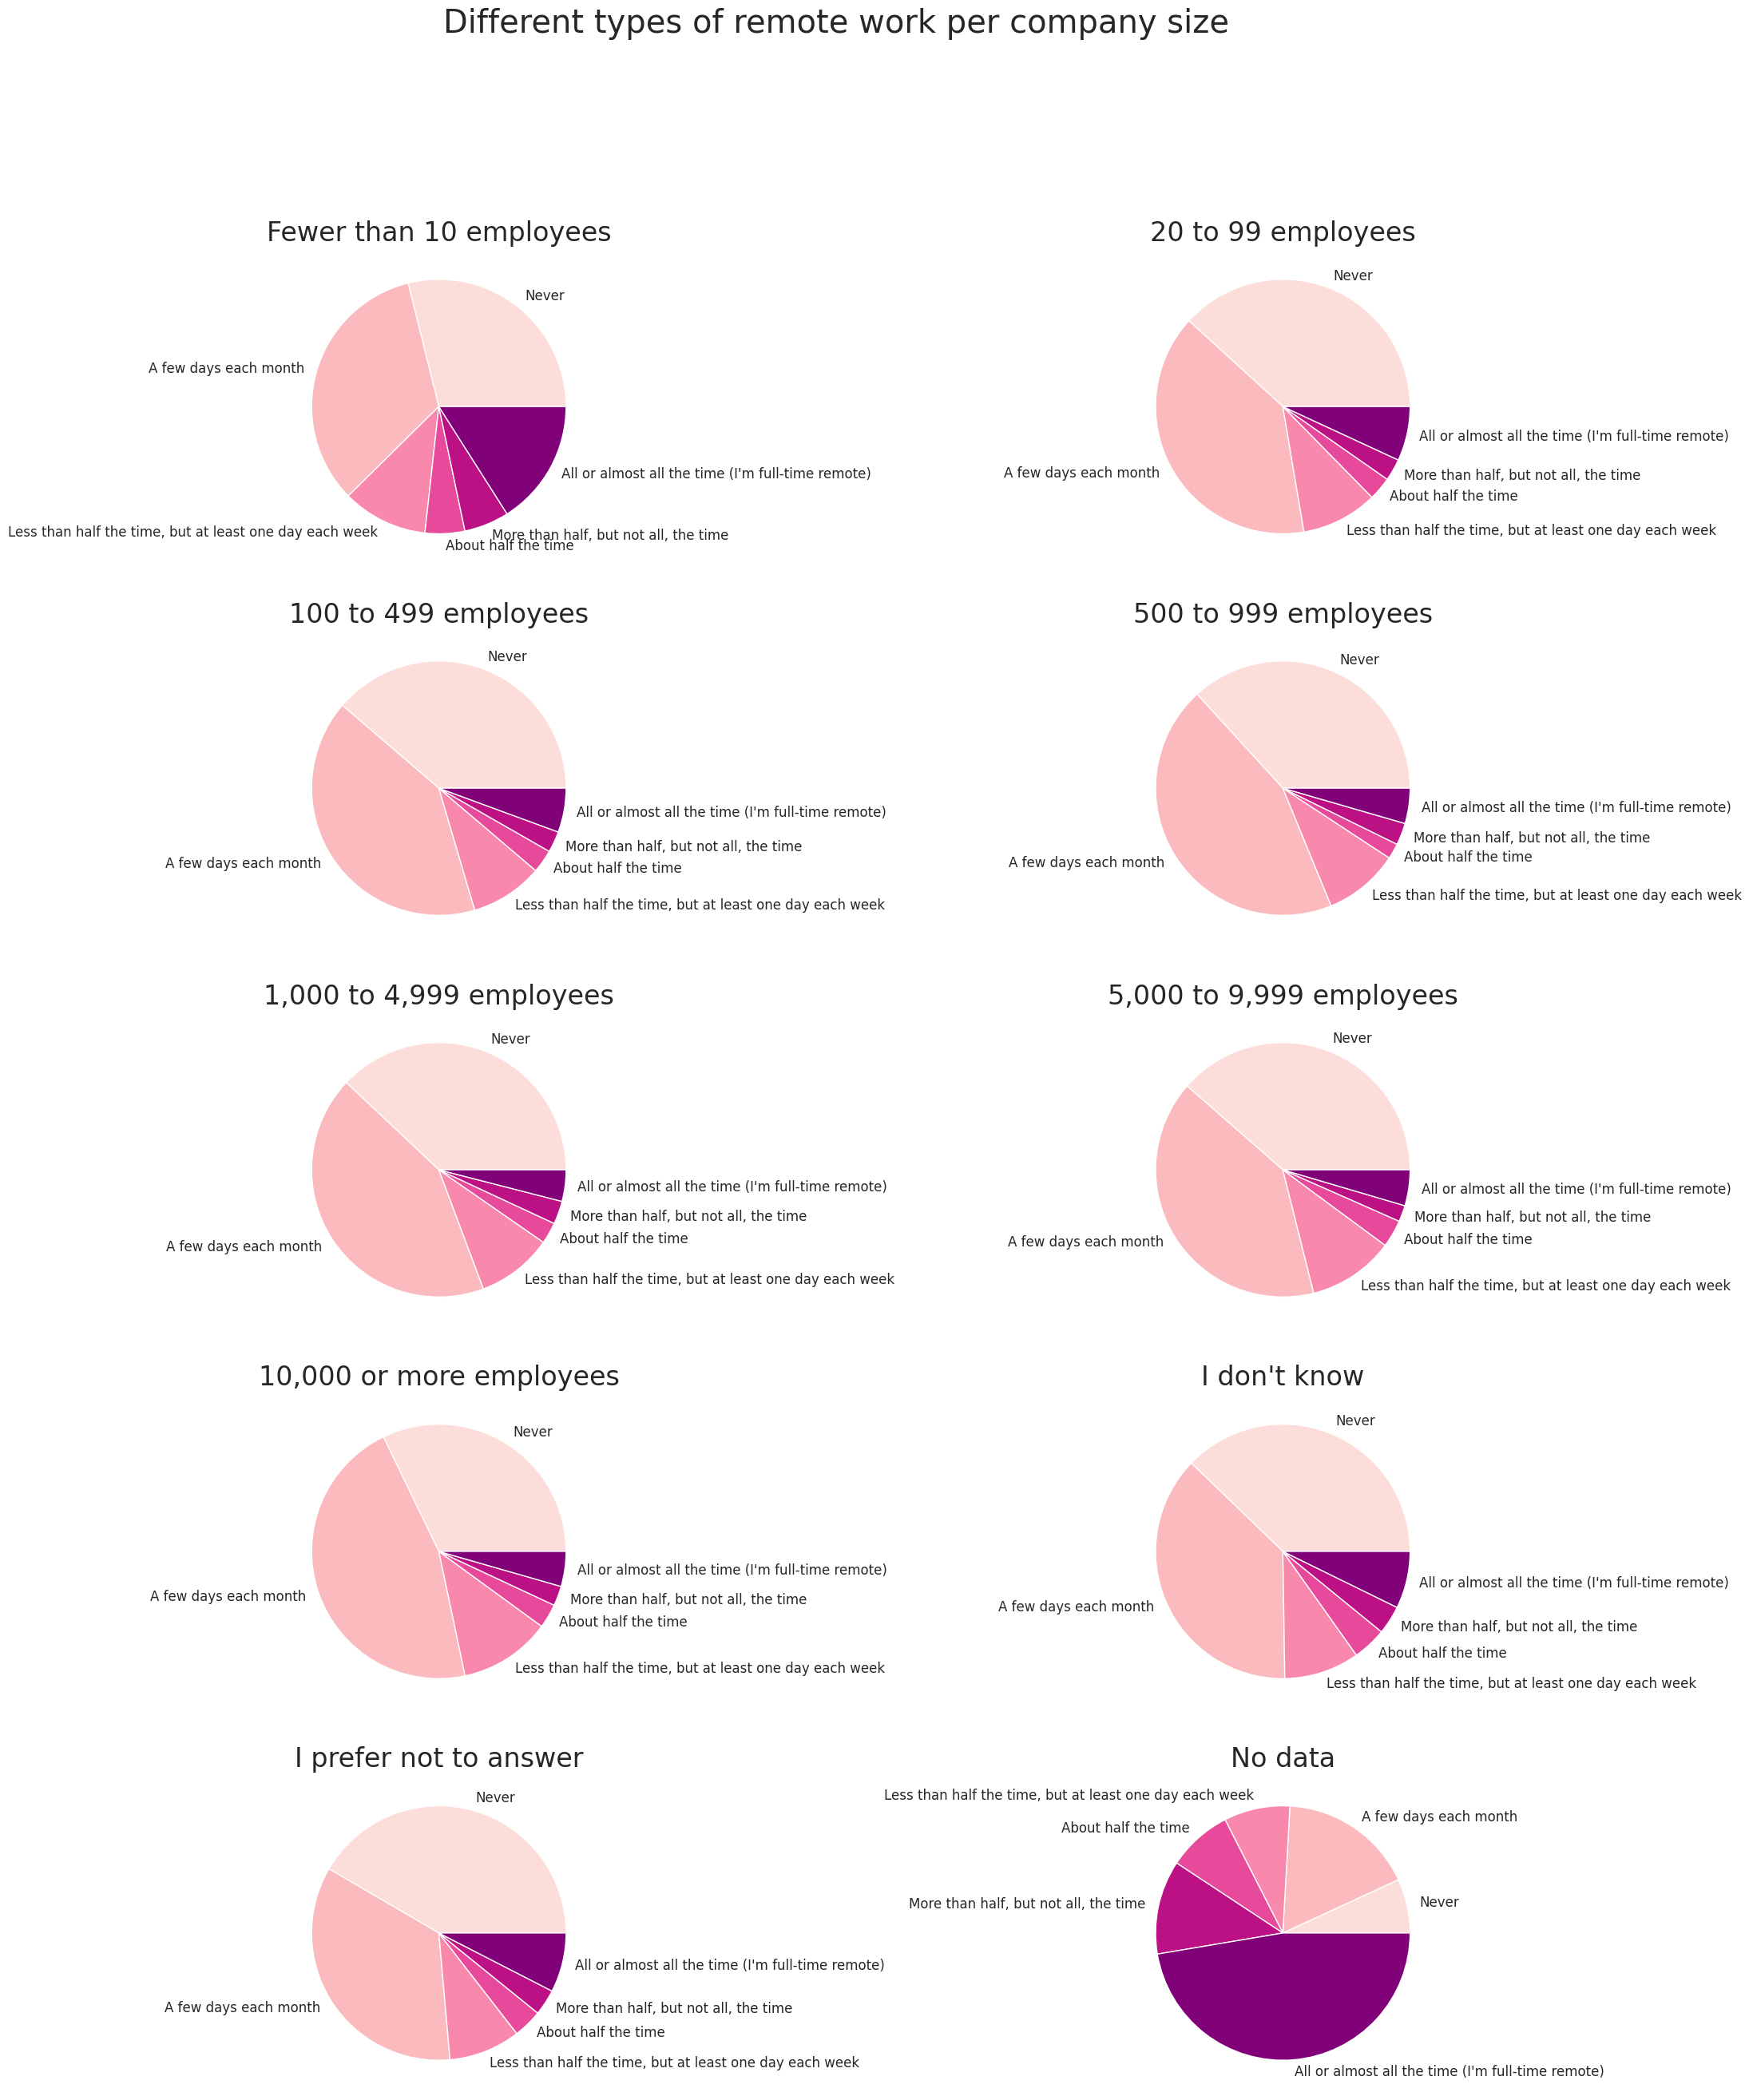

In [80]:
#plot = temp_df[cat].plot.pie( figsize=(10, 10), subplots = True, ylabel = '', legend = False, title = cat, xlabel ='')
# We plot several pie charts for each company size category to compare the relative proportion of each Remote-Work group
plot = temp_df.plot.pie(figsize=(25, 30),  # Define the size of the whole plot (not of every individual subplot)
                        subplots = True,  # Create a subplot for each company size category
                        legend = False, # Remove the legend - the Remote-work categories are shown next to each pie chart anyway
                        ylabel = '', # Remove the y-label (company size category) on the left side of each plot (cannot be read appropriately)
                        layout= (5, 2), # Define the layout
                        fontsize = 12,
                        title = "Different types of remote work per company size")
# Set the titles for all subplots
counter = 0
for i in range(0, 5):
    for j in range(0,2):
        plot[i][j].set_title(comp_size_index[counter])
        counter += 1

As we can see, working remotely seems to be more common for employees at smaller companies. As mentioned earlier, the group for which we have no data has the highest percentage of remote workers by a wide margin

## Question 3 - What are the most common ways for companies to search for remote workforce?

To answer these questions, the LearnedHiring-column is the most important one! As earlier, we can only use the data from individuals who are employed currently.

LearnedHiring	Think back to when you first applied to work for your current employer. Which of the following best describes how you learned that they were hiring for that particular job?

In [81]:
df_working.head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,Remote,FullYearsCodedJob
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,False,20
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,False,9
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,NaN,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,10
6,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,...,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN,False,8
7,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Pre-series A startup,...,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN,True,7


In [82]:
analyze_column(df_working["LearnedHiring"])

Value counts: 

A friend, family member, or former colleague told me                            5574
I was contacted directly by someone at the company (e.g. internal recruiter)    3799
A general-purpose job board                                                     2956
An external recruiter or headhunter                                             2896
I visited the company's Web site and found a job listing there                  1725
A career fair or on-campus recruiting event                                     1549
Some other way                                                                  1499
A tech-specific job board                                                        868
Name: LearnedHiring, dtype: int64

Null values: 17154


We want to compare employees who do not work remotely and people who work remotely a lot ("More than half, but not all, the time" or "All or almost all the time (I'm full-time remote)") regarding how they learned that their current emplooyer is hiring for their current position

In [83]:
df_remote = df_working.loc[df_working['Remote'] == True]

In [84]:
analyze_column(df_remote["LearnedHiring"])

Value counts: 

A friend, family member, or former colleague told me                            584
I was contacted directly by someone at the company (e.g. internal recruiter)    513
A general-purpose job board                                                     204
Some other way                                                                  203
An external recruiter or headhunter                                             195
I visited the company's Web site and found a job listing there                  151
A tech-specific job board                                                       134
A career fair or on-campus recruiting event                                      79
Name: LearnedHiring, dtype: int64

Null values: 3776


In [85]:
# Percentages for all individuals
df_working["LearnedHiring"].value_counts() / df_working["LearnedHiring"].count()

A friend, family member, or former colleague told me                            0.267133
I was contacted directly by someone at the company (e.g. internal recruiter)    0.182067
A general-purpose job board                                                     0.141666
An external recruiter or headhunter                                             0.138790
I visited the company's Web site and found a job listing there                  0.082670
A career fair or on-campus recruiting event                                     0.074236
Some other way                                                                  0.071839
A tech-specific job board                                                       0.041599
Name: LearnedHiring, dtype: float64

In [86]:
# Percentages for all individuals who work remotely
df_remote["LearnedHiring"].value_counts() / df_remote["LearnedHiring"].count()

A friend, family member, or former colleague told me                            0.283083
I was contacted directly by someone at the company (e.g. internal recruiter)    0.248667
A general-purpose job board                                                     0.098885
Some other way                                                                  0.098400
An external recruiter or headhunter                                             0.094523
I visited the company's Web site and found a job listing there                  0.073194
A tech-specific job board                                                       0.064954
A career fair or on-campus recruiting event                                     0.038294
Name: LearnedHiring, dtype: float64

In [87]:
# Before evaluating, we take a look how many values are missing
df_working["LearnedHiring"].isna().value_counts()

False    20866
True     17154
Name: LearnedHiring, dtype: int64

In [88]:
# As we can see, nearly half of the data is missing! This will make a prediction based on this data diffcult. Neithertheless, we are going to proceed and drop the na-data.
df_working.dropna(subset=["LearnedHiring"], inplace=True)

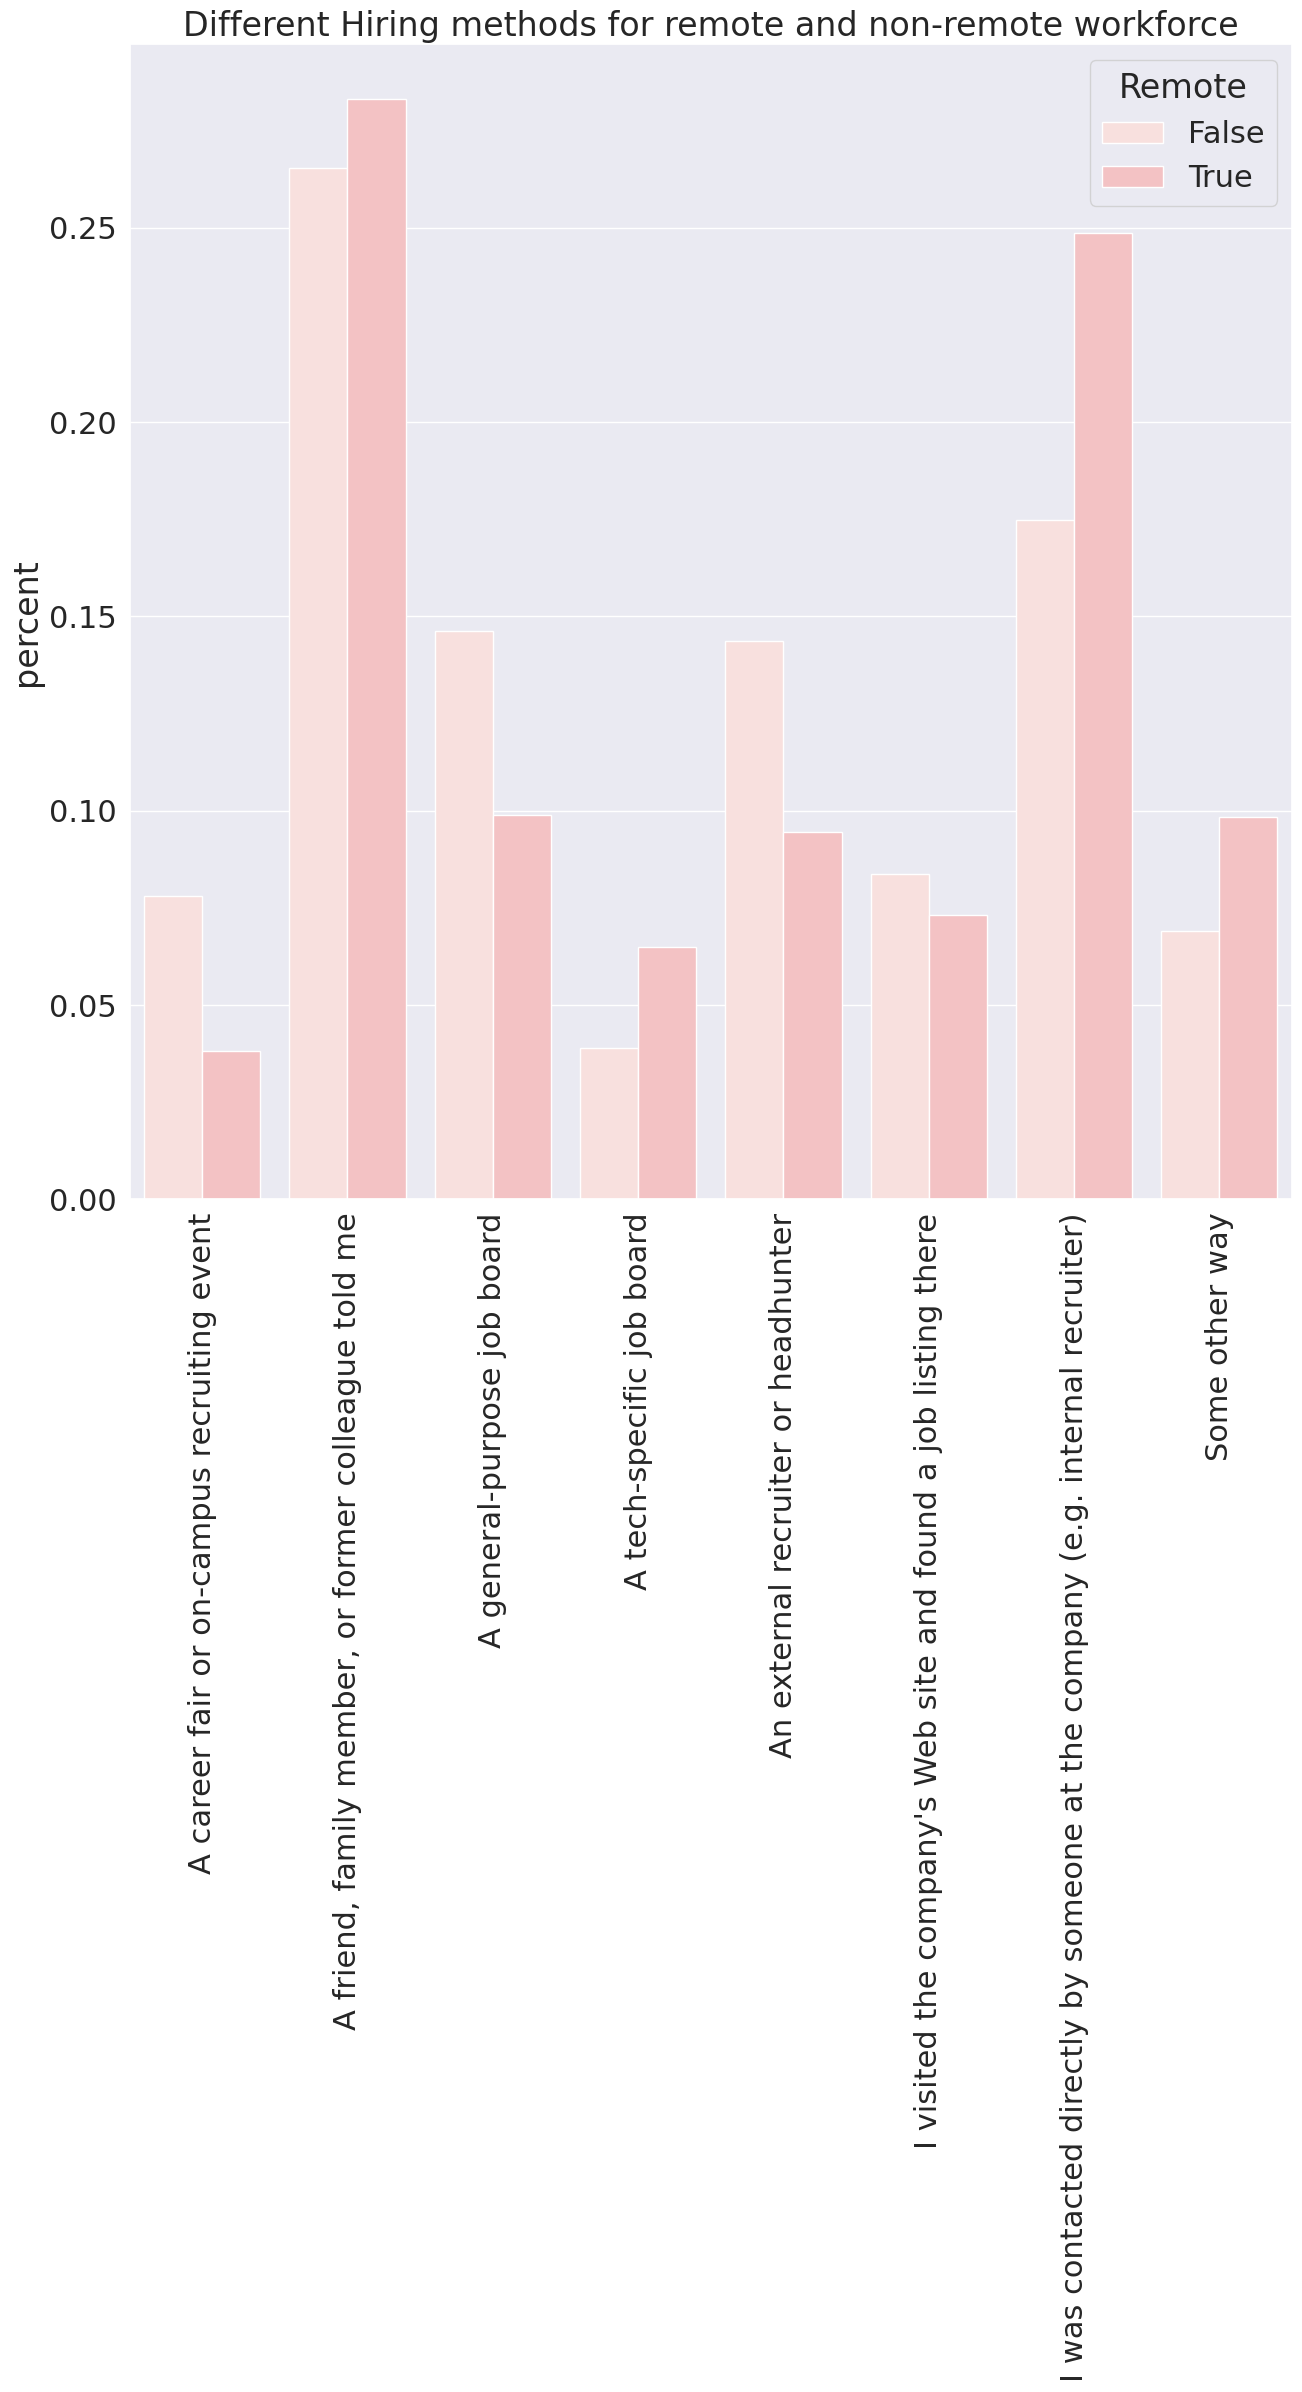

In [90]:
new_df = (df_working.groupby(['LearnedHiring','Remote']).size() / df_working.groupby(['Remote']).size()).reset_index().rename({0:'percent'}, axis=1)
plot = sns.barplot(x=new_df["LearnedHiring"], y = new_df["percent"], hue=new_df["Remote"])
plot.set_xticklabels(labels = plot.get_xticklabels(), rotation=90)
plot.set(xlabel=None)
dummy_var = plot.set_title("Different Hiring methods for remote and non-remote workforce")

As we can see, many remote employees were contacted directly by f.e. an internal recruiter of their current employer compared to non-remote employees. Tech-specific job boards are also more common for remote employees to find a remote job. On the other hand, career fairs, general-purpose job boards and external recruiters are options less preferable for people who want to work remotely.

We can conclude that a person who wants to work remotely should focus on self-promotion to get recognized by companies which search for remote workforce. This could be done by creating a expressive profile on LinkedIn or being active on websites like Medium, StackOverFlow or Kaggle. Additionally, searching for jobs in specialized job boards could be an option.